In [48]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
from matplotlib import colors
import mplhep as hep
hep.style.use(hep.style.CMS)
hep.set_style("CMS")

filenumber = 961
avgp2p = []

with open("Jun15Scan1.txt") as f:
    points = (f.read().split('Point'))

for point in points:                             #iterate through files
    
    peaktopeak = []
    p2ps = point.split('\n')
    for p2p in p2ps:
        try:
            peaktopeak.append(float(p2p))
        except ValueError:
            x=1
    if len(peaktopeak) != 0:
        avgp2p.append(sum(peaktopeak)/len(peaktopeak))  

        
#For square heatmap


rows = int(filenumber / np.sqrt(filenumber))
columns = int(filenumber / np.sqrt(filenumber))
heatmap = [0]*rows

k = 0
for i in range(0, rows):                                   #make 2d array of averages
    column = []
    for j in range(0, columns):
        column.append(avgp2p[k])
        k += 1
    heatmap[i] = column
print(heatmap)

[[19.227066933066933, 21.307991008990992, 26.47595804195807, 41.091372627372664, 42.829183816183786, 42.624392607392586, 41.92994505494512, 39.692335664335644, 37.8228531468532, 34.27987112887113, 30.430363636363648, 24.94364035964038, 20.745264735264744, 30.96355744255741, 35.51300399600399, 39.44809590409586, 41.68870129870123, 42.88939360639358, 43.09353146853152, 43.00698101898102, 41.364082917082904, 39.60241958041955, 36.450375624375624, 32.84990909090907, 20.55599900099901, 22.16193406593406, 26.569374625374618, 31.18467132867128, 33.49022677322675, 36.74287712287716, 38.9983946053946], [19.288785214785246, 22.944732267732267, 45.340208791208795, 40.44649250749243, 39.44840559440559, 40.95065634365631, 40.75772727272727, 39.55840259740257, 37.260210789210774, 34.283938061938095, 31.14519080919079, 28.240686313686336, 27.44028571428571, 30.0962797202797, 35.85219480519483, 40.60979720279718, 42.288659340659315, 43.33084215784209, 43.92138661338656, 43.18307292707294, 42.442610389

<function matplotlib.pyplot.show(close=None, block=None)>

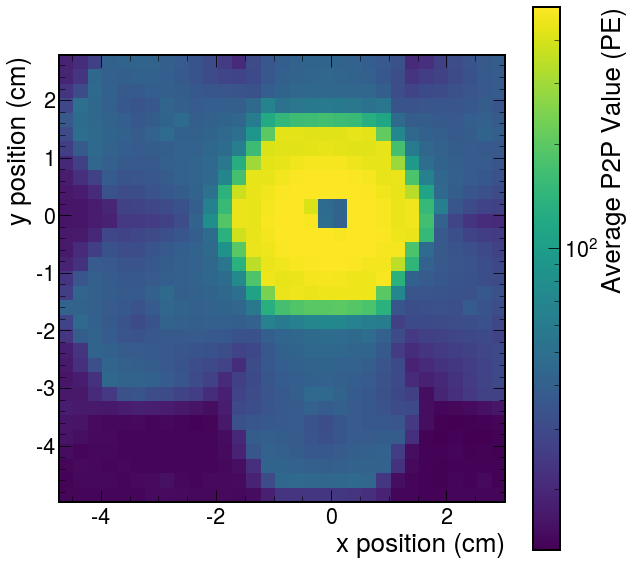

In [135]:
#plt.imshow(heatmap, cmap='viridis',vmin = 0, extent=[-2.25 - 0.75,2.25 + 0.75,-2.25 -0.75,2.25 + 0.75])
center1 = 0.85
center2 = 1.1
width = 7.5
step = 0.25
rad = width/2
lbound1 = rad - center1 + (step/2)
rbound1 = -rad - center1 - (step/2)

lbound2 = rad - center2 + (step/2)
rbound2 = -rad - center2 - (step/2)


plt.imshow(heatmap, cmap='viridis',norm=colors.LogNorm(), extent=[rbound1,lbound1,rbound2,lbound2])
hep.style.use(hep.style.CMS)
hep.set_style("CMS")
plt.xlabel("x position (cm)")
plt.ylabel("y position (cm)")
cbar = plt.colorbar()
cbar.set_label("Average P2P Value (PE)")
plt.show

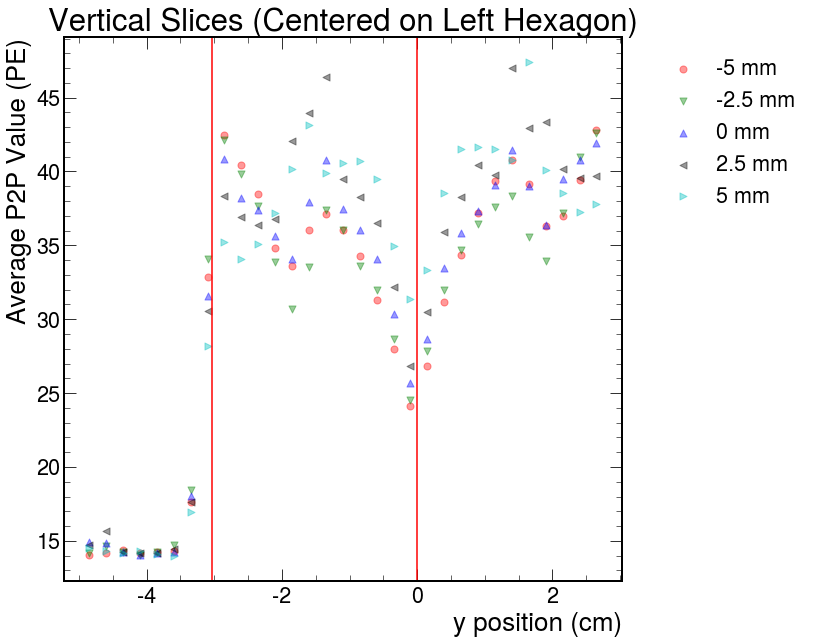

In [137]:
center = 1.1
width = 7.5
rad = width/2
lbound = rad - center
rbound = -rad - center

maxValue = 0
for i in range(5):
    for value in heatmap:
        if value[13+i] > maxValue:
            maxValue = value[16+i]
fig = plt.figure()
ax = plt.subplot(111)

        
col = 4           
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound,31),linevalues,s=50,color='r',label='-5 mm',alpha=0.4)

col = col+1              
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='g',label='-2.5 mm',alpha=0.4,marker='v')

col = col+1              
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='b',label='0 mm',alpha=0.4,marker='^')

col = col+1             
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='k',label='2.5 mm',alpha=0.4,marker='<')

col = col+1           
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='c',label='5 mm',alpha=0.4,marker='>')



ax.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
        
plt.xlabel("y position (cm)")
plt.ylabel("Average P2P Value (PE)")
plt.title("Vertical Slices (Centered on Left Hexagon)")
#plt.axvline(1.316,color='red',label='Hexagon top boundary')
#plt.axvline(-1.316,color='red',label='Hexagon bottom boundary')
#plt.axvline(-0.3,color='red',label='SiPM top boundary')
#plt.axvline(0.3,color='red',label='SiPM bottom boundary')

plt.axvline(0,color='red',label='SiPM bottom boundary')
plt.axvline(-3.0393,color='red',label='SiPM bottom boundary')

plt.show()

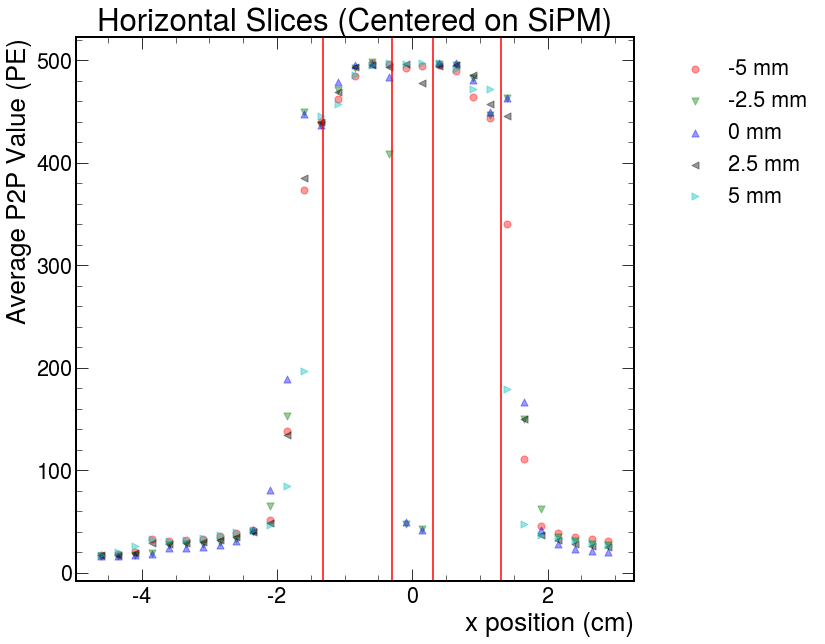

In [130]:
center = 0.85
width = 7.5
rad = width/2
lbound = -rad - center
rbound = rad - center


maxValue = 0
for i in range(5):
    for value in heatmap[13+i]:
        if value > maxValue:
            maxValue = value
fig = plt.figure()
ax = plt.subplot(111)

        
col = 9               
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='r',label='-5 mm',alpha=0.4)

col = col+1              
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='g',label='-2.5 mm',alpha=0.4,marker='v')

col = col+1             
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='b',label='0 mm',alpha=0.4,marker='^')

col = col+1               
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='k',label='2.5 mm',alpha=0.4,marker='<')

col = col+1             
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='c',label='5 mm',alpha=0.4,marker='>')


ax.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
        
plt.xlabel("x position (cm)")
plt.ylabel("Average P2P Value (PE)")
plt.title("Horizontal Slices (Centered on SiPM)")
plt.axvline(1.316,color='red',label='Hexagon top boundary')
plt.axvline(-1.316 ,color='red',label='Hexagon bottom boundary')
plt.axvline(-0.3 ,color='red',label='SiPM top boundary')
plt.axvline(0.3 ,color='red',label='SiPPM bottom boundary')

plt.show()